In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,recall_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Shashikanth\OneDrive\Documents\Mentoring\Data Science\Internship\weekly Projects\reviews_badminton\data.csv")

In [3]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
df.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [5]:
df.duplicated().sum()

4

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8514 entries, 0 to 8515
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8514 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 598.6+ KB


In [9]:
# Drop rows with missing values
df.dropna(subset=['Review text', 'Ratings'], inplace=True)

In [10]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8505,MD. Jabbar,Very Good,NaN,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3
8506,Abani Behera,Don't waste your money,NaN,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4
8507,vishnu varma,Really Nice,"Certified Buyer, Agartala",0.0,1.0,Sep 2016,Nice delivery speedREAD MORE,5
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5


In [11]:
# Convert ratings to binary sentiment labels
df['Sentiment'] = np.where(df['Ratings'] > 3, 'Positive', 'Negative')

In [12]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,Negative
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
...,...,...,...,...,...,...,...,...,...
8505,MD. Jabbar,Very Good,NaN,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3,Negative
8506,Abani Behera,Don't waste your money,NaN,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4,Positive
8507,vishnu varma,Really Nice,"Certified Buyer, Agartala",0.0,1.0,Sep 2016,Nice delivery speedREAD MORE,5,Positive
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5,Positive


In [13]:
df.isna().sum()

Reviewer Name        2
Review Title         2
Place of Review     42
Up Votes             2
Down Votes           2
Month              457
Review text          0
Ratings              0
Sentiment            0
dtype: int64

In [14]:
def remove_repetitive_emojis(x):
    emoji_pattern = re.compile(r"(\s*)([\U0001F600-\U0001F64F"
                               r"\U0001F300-\U0001F5FF"
                               r"\U0001F680-\U0001F6FF"
                               r"\U0001F1E0-\U0001F1FF"
                               r"\U00002500-\U00002BEF"
                               r"\U00002702-\U000027B0"
                               r"\U000024C2-\U0001F251"
                               r"\U0001f926-\U0001f937"
                               r"\U00010000-\U0010ffff"
                               r"\u2640-\u2642"
                               r"\u2600-\u2B55"
                               r"\u200d"
                               r"\u23cf"
                               r"\u23e9"
                               r"\u231a"
                               r"\ufe0f"
                               r"\u3030"
                               r"]{1,})", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'\1', x)
    return cleaned_text

In [15]:
# Function to preprocess text
def remove_punctuation_and_numbers(x):
    pattern = r'[^\w\s]|[\d]'
    cleaned_text = re.sub(pattern,'', x)
    return cleaned_text

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    #Stemming words
    stem=PorterStemmer()
    stem_token=[stem.stem(word) for word in filtered_tokens]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

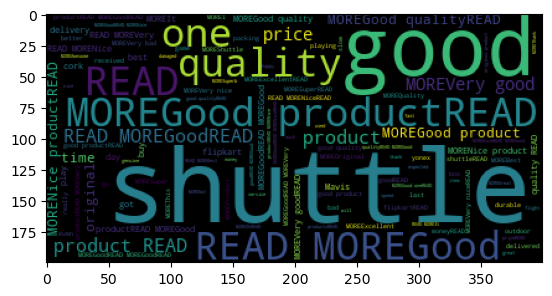

In [16]:
from wordcloud import WordCloud
vector = CountVectorizer()
vector.fit_transform(df['Review text']).toarray()
text = "".join(df['Review text'].values.tolist())
data=WordCloud().generate(text)
plt.imshow(data)

In [17]:
# Apply preprocessing to the 'Review Text' column
df['Review text'] = df['Review text'].apply(preprocess_text)

In [18]:
analyzer = SentimentIntensityAnalyzer()

In [19]:
def polarity(n):
    return analyzer.polarity_scores(n)['compound']

In [20]:
df['Emotion'] = df['Review text'].apply(polarity)

In [21]:
def sentiment(n):
    if n > 0:
        return 'Positive'
    elif n < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [22]:
df['Emotion'] = df['Emotion'].apply(sentiment)

<Axes: >

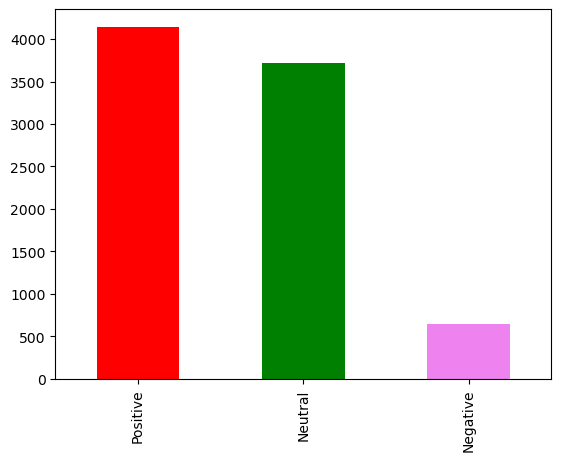

In [23]:
df['Emotion'].value_counts().plot(kind = 'bar', color=['red','green','violet'])

In [24]:
df = pd.concat([df['Review text'],df['Emotion']],axis=1)

In [25]:
df['Emotion'].value_counts()

Positive    4145
Neutral     3722
Negative     643
Name: Emotion, dtype: int64

## Splitting the Data

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
X=df['Review text']
y=df['Emotion']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=35)

In [29]:
X_test

7886                                             goodread
1587                   original awesome love flipkartread
5413                                           superbread
2482    amazing genuine product best pricego ahead wit...
8074                                              nycread
                              ...                        
8236                                     quality goodread
4179                                     good productread
334                                              goodread
4351                                     nice productread
987                     one best shuttle outdoor playread
Name: Review text, Length: 1702, dtype: object

## Auto Logging Naive Bayes Experiment Run using MLFlow

In [30]:
#!pip install mlflow

In [31]:
import mlflow

mlflow.set_experiment("sentiment_analysis_prediction")

<Experiment: artifact_location='file:///C:/Users/Shashikanth/OneDrive/Documents/Mentoring/Data%20Science/Internship/weekly%20Projects/mlruns/924697325909066005', creation_time=1711359977926, experiment_id='924697325909066005', last_update_time=1711359977926, lifecycle_stage='active', name='sentiment_analysis_prediction', tags={}>

In [32]:
pipe=Pipeline([('Vectorization',CountVectorizer(stop_words='english')),
              ("Estimator",MultinomialNB(alpha=3))])

In [33]:
param_grid = {
    'Vectorization__stop_words': [None, 'english'],  # Stop words option
    'Vectorization__ngram_range': [(1, 1), (1, 2)],  # N-gram range
    'Estimator__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]  # Smoothing parameter
}

In [34]:
clf = GridSearchCV(estimator=pipe, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           return_train_score=True,
                           verbose=1
                          )

mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run() as run:
    %time clf.fit(X_train, y_train)

2024/03/27 12:07:05 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logged at level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/03/27 12:07:05 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.

Fitting 5 folds for each of 28 candidates, totalling 140 fits
CPU times: total: 19 s
Wall time: 29.8 s


## Auto Logging KNN Experiment Run using MLFlow

In [35]:
pipe_2 = Pipeline([
    ('Vectorization', CountVectorizer()),
    ("neighbours", KNeighborsClassifier())
])

parameter_grid_2 = [
    {
        'Vectorization': [CountVectorizer()],
        'neighbours__n_neighbors': [i for i in range(3, 21, 2)],              
        'neighbours__p': [1, 2, 3]
    }
]

clf = GridSearchCV(
    estimator=pipe_2, 
    param_grid=parameter_grid_2, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run() as run:
    %time clf.fit(X_train, y_train)

2024/03/27 12:07:35 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 3min 30s
Wall time: 1min 58s


## Auto Logging TF-IDF Experiment Run using MLFlow

In [36]:
pipe_3 = Pipeline([
    ('Vectorization', TfidfVectorizer()),  # You can switch between CountVectorizer and TfidfVectorizer here
    ('Estimator', MultinomialNB())
])

# Define the hyperparameters grid
param_grid_3 = [{
    'Vectorization__stop_words': [None, 'english'],  # Stop words option
    'Vectorization__ngram_range': [(1, 1), (1, 2)],  # N-gram range
    'Estimator__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]  # Smoothing parameter
}]

In [37]:
clf = GridSearchCV(
    estimator=pipe_3, 
    param_grid=param_grid_3, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run() as run:
    %time clf.fit(X_train, y_train)

2024/03/27 12:09:35 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 28 candidates, totalling 140 fits
CPU times: total: 17.7 s
Wall time: 30 s


## Auto Logging ALL Experiment Run using MLFlow

In [38]:
pipelines = {
    'naive_bayes' : Pipeline([
        ('Vectorization',CountVectorizer(stop_words='english')),
        ("Estimator",MultinomialNB(alpha=3))
    ]), 
    'knn' : Pipeline([
        ('Vectorization', CountVectorizer()),
        ("neighbours", KNeighborsClassifier())
    ]),
    'tf-idf': Pipeline([
       ('Vectorization', TfidfVectorizer()),
        ('Estimator', MultinomialNB())
    ]),
    'random_forest': Pipeline([
        ('Vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('Vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ])
}

In [39]:
param_grids = {
    'naive_bayes': [
        {
            'Vectorization__stop_words': [None, 'english'],  
            'Vectorization__ngram_range': [(1, 1), (1, 2)], 
            'Estimator__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
        }
    ],
    'knn': [
        {
            'Vectorization': [CountVectorizer()],
            'neighbours__n_neighbors': [i for i in range(3, 21, 2)],              
            'neighbours__p': [1, 2, 3]
        }
    ],
    'tf-idf': [
        {
            'Vectorization__stop_words': [None, 'english'],  # Stop words option
            'Vectorization__ngram_range': [(1, 1), (1, 2)],  # N-gram range
            'Estimator__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]  
        }
    ],
    'random_forest': [
        {
            'Vectorization__stop_words': [None, 'english'],
            'Vectorization__ngram_range': [(1, 1), (1, 2)],
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'decision_tree': [
        {
            'Vectorization__stop_words': [None, 'english'],
            'Vectorization__ngram_range': [(1, 1), (1, 2)],
            'classifier__max_depth': [None, 5, 10]
        }
    ]
}  

In [40]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)
    
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))

    best_models[algo] = grid_search.best_estimator_
    print()

********** naive_bayes **********


2024/03/27 12:10:05 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 28 candidates, totalling 140 fits
CPU times: total: 17.9 s
Wall time: 28.8 s
Train Score:  0.9046713513968416
Test Score:  0.9142185663924794

********** knn **********


2024/03/27 12:10:34 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 3min 37s
Wall time: 1min 49s
Train Score:  0.8914515003112724


2024/03/27 12:12:24 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Test Score:  0.8842538190364277

********** tf-idf **********
Fitting 5 folds for each of 28 candidates, totalling 140 fits
CPU times: total: 19.6 s
Wall time: 28 s
Train Score:  0.8921851752350187
Test Score:  0.9018801410105758

********** random_forest **********


2024/03/27 12:12:52 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 5min 12s
Wall time: 5min 51s
Train Score:  0.9513797943768132
Test Score:  0.9582843713278496

********** decision_tree **********


2024/03/27 12:18:44 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 12.8 s
Wall time: 20.3 s
Train Score:  0.9597529673374398
Test Score:  0.9712103407755581



In [41]:
grid_search.best_estimator_,grid_search.best_params_

(Pipeline(steps=[('Vectorization', CountVectorizer()),
                 ('classifier', DecisionTreeClassifier())]),
 {'Vectorization__ngram_range': (1, 1),
  'Vectorization__stop_words': None,
  'classifier__max_depth': None})

In [42]:
import pickle
with open ('sentimentanalysis_mlflow.pkl','wb') as f:
    pickle.dump(pipe,f)

In [43]:
predict = pickle.load(open('sentimentanalysis_mlflow.pkl','rb'))

In [ ]:
predict.predict(['its a good product'])[0]

In [ ]:
import joblib
print(joblib.__version__)